# <center> Chart Image Classification </center>

## Problem statement:

- Develop a CNN based classification architecture for classifying a given chart image to one of five chart classes,
namely “Line”,“Dot Line”,“Horizontal Bar”,“Vertical Bar”, and “Pie” chart.
Use train and val images for training and validation in an appropriate ratio (e.g., 80% for
training and 20 % for validating). The CSV file contains corresponding labels for the images.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.layers import BatchNormalization

In [2]:
path = './charts/train_val'
# Load the CSV file containing the image labels
path_val = './charts/test'
labels = pd.read_csv(".\\charts\\train_val.csv")

In [3]:
print(labels.shape)

(1000, 2)


In [4]:
encoder = LabelEncoder()
y = ['dot_line', 'hbar_categorical', 'line', 'pie', 'vbar_categorical']

encoder.fit(y)
# Encode the labels in the 'chart_type' column
labels['chart_type_encoded'] = encoder.fit_transform(labels['type'])
np.unique(labels['type'])

array(['dot_line', 'hbar_categorical', 'line', 'pie', 'vbar_categorical'],
      dtype=object)

In [5]:
noOfClasses = len (np.unique(labels['chart_type_encoded']))
noOfClasses

5

In [6]:
# Load the chart images
images = []
classNo = []
chartimages = []
myPicList = os.listdir(path)
for filename in myPicList:
    curImg = cv2.imread(path +"/"+filename)
    index = filename.split(".")[0]
    chartclass =  labels.loc[labels['image_index'] == int(index), 'chart_type_encoded'].iloc[0]
    #curImg = cv2.cvtColor(curImg, cv2.COLOR_BGR2RGB)
    #curImg = cv2.resize(curImg, (224, 224))
    #print(type(chartclass))
    #if(chartclass == 1):
        #plt.subplot(10, 10,  1)
        #plt.imshow(curImg)
        #plt.show()        
    curImg = cv2.resize(curImg,(32,32))
    images.append(curImg)
    classNo.append(chartclass)

In [7]:
valdateImages = []
myPicList = os.listdir(path_val)
for y in myPicList:
    curImg = cv2.imread(path_val + "/"+y)
    curImg = cv2.resize(curImg,(32,32))
    valdateImages.append(curImg)
        
        


In [8]:
# Convert the images and labels into numpy arrays
images = np.array(images)
classNo = np.array(classNo)
valdateImages = np.array(valdateImages)

In [9]:
print("train data images Shape")
print(images.shape)
print("train data class No shape ")
print(classNo.shape)
print(valdateImages.shape)

train data images Shape
(1000, 32, 32, 3)
train data class No shape 
(1000,)
(50, 32, 32, 3)


# Spliting Data

In [10]:
X_train,X_test,y_train,y_test = train_test_split(images,classNo,test_size=0.2)
print("X train data shape is ......",X_train.shape)
print("X test data shape is .......",X_test.shape)
print("Y train data shape is ......",y_train.shape)
print("Y test data shape is .......",y_test.shape)

X train data shape is ...... (800, 32, 32, 3)
X test data shape is ....... (200, 32, 32, 3)
Y train data shape is ...... (800,)
Y test data shape is ....... (200,)


# spliting validate data

In [11]:
#X_train,X_validate,y_train,y_validate = train_test_split(X_train,y_train,test_size=0.2)
#print("X train data shape is ......",X_train.shape)
#print("X validate data shape is .......",X_validate.shape)
#print("Y train data shape is ......",y_train.shape)
#print("Y validate data shape is .......",y_validate.shape)

# check how many images we have of each class

In [12]:
numOfSamples = []
print(noOfClasses)
for x in range (0, noOfClasses):
    numOfSamples.append(len(np.where(y_train == x)[0]))
    #print(len(np.where(y_train == x)[0]))
print(numOfSamples)

5
[172, 168, 147, 158, 155]


In [13]:
import matplotlib.pyplot as plt

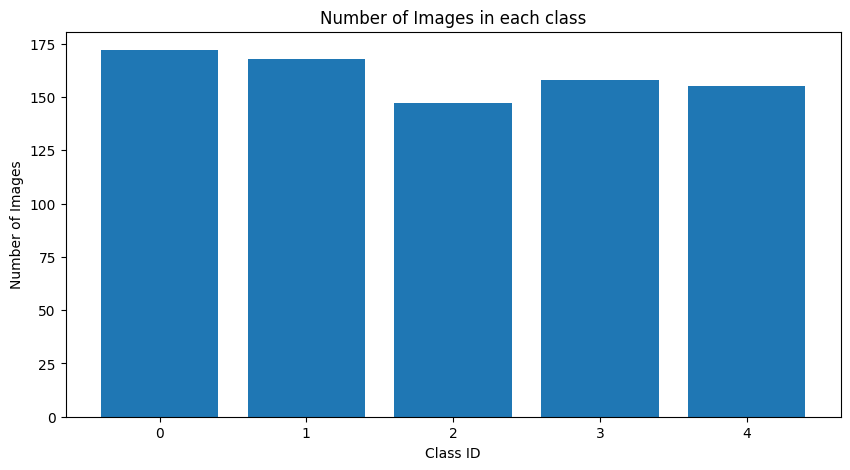

In [14]:
plt.figure(figsize=(10,5))
plt.bar(range(0,noOfClasses), numOfSamples)
plt.xlabel('Class ID')
plt.ylabel('Number of Images')
  
# naming the title of the plot
plt.title('Number of Images in each class')
plt.show()

In [15]:
def preProcessing(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.equalizeHist(img)
    img = img/255
    return img

In [16]:
X_train = np.array(list(map(preProcessing,X_train)))

In [17]:
X_test = np.array(list(map(preProcessing,X_test)))
X_validate = np.array(list(map(preProcessing,valdateImages)))

# adding depth

In [18]:
print(X_train.shape)
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],X_train.shape[2],1)
print(X_train.shape)

(800, 32, 32)
(800, 32, 32, 1)


In [19]:
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],X_test.shape[2],1)
X_validate = X_validate.reshape(X_validate.shape[0],X_validate.shape[1],X_validate.shape[2],1)

# Agumentation

In [20]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical

In [21]:
dataGen = ImageDataGenerator(rotation_range=20,
                             width_shift_range=0.2,
                             height_shift_range=0.2,
                             shear_range = 0.1,
                             zoom_range = 0.2)
dataGen.fit(X_train)
#dataGen.fit(X_test)
#dataGen.fit(X_validate)

In [22]:
y_train = to_categorical(y_train, noOfClasses)
y_test = to_categorical(y_test, noOfClasses)
#y_validate = to_categorical(y_validate, noOfClasses)

In [23]:
from tensorflow.python.keras.layers.convolutional import Conv2D
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.python.keras.layers.convolutional import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [24]:
def myModel():
    noOfFilters = 60
    sizeOfFilter1 = (5,5)
    sizeOfFilter2 = (3,3)
    sizeOfPool = (2,2)
    noOfNode = 500
    imageDimensions = (32,32,3)
    model = Sequential()
    model.add((Conv2D(noOfFilters,sizeOfFilter1,input_shape = (imageDimensions[0],imageDimensions[1],1),activation='relu')))
    model.add((Conv2D(noOfFilters,sizeOfFilter1,activation='relu')))
    model.add(MaxPooling2D(pool_size = sizeOfPool))
    model.add(BatchNormalization()) 
    model.add((Conv2D(noOfFilters//2,sizeOfFilter2,activation='relu')))
    model.add((Conv2D(noOfFilters//2,sizeOfFilter2,activation='relu')))
    model.add(MaxPooling2D(pool_size = sizeOfPool))
    model.add(BatchNormalization()) 
    model.add(Dropout(0.5))
    model.add(Flatten())
    model.add(Dense(noOfNode,activation = 'relu'))
    model.add(Dropout(0.5))
    model.add(Dense(noOfClasses,activation = 'softmax'))
    model.compile(Adam(learning_rate = 0.001),loss = 'categorical_crossentropy',metrics = ['accuracy'])
    return model

## Model 1

In [25]:
model1 = myModel()
#print(modelwe.summary())
batchSizeVal = 40
epochsVal = 30
stepsPerEpoch = 20
# history = model.fit(dataGen.flow(X_train,y_train,batch_size = batchSizeVal),
#                    steps_per_epoch = stepsPerEpoch, epochs = epochsVal, validation_data = (X_test,y_test),
#                    shuffle = 1)
history = model1.fit(X_train, y_train, validation_data=(X_test, y_test), steps_per_epoch = stepsPerEpoch, epochs = epochsVal, batch_size=32)


Epoch 1/30
20/20 [==============================] - 3s 94ms/step - loss: 1.1716 - accuracy: 0.5781 - val_loss: 1.8353 - val_accuracy: 0.1550
Epoch 2/30
20/20 [==============================] - 2s 87ms/step - loss: 0.4965 - accuracy: 0.7875 - val_loss: 2.3491 - val_accuracy: 0.1400
Epoch 3/30
20/20 [==============================] - 2s 84ms/step - loss: 0.3790 - accuracy: 0.8188 - val_loss: 2.7723 - val_accuracy: 0.2650
Epoch 4/30
20/20 [==============================] - 2s 82ms/step - loss: 0.3049 - accuracy: 0.8578 - val_loss: 3.0911 - val_accuracy: 0.2650
Epoch 5/30
20/20 [==============================] - 2s 83ms/step - loss: 0.2619 - accuracy: 0.8844 - val_loss: 3.6118 - val_accuracy: 0.2650
Epoch 6/30
20/20 [==============================] - 2s 85ms/step - loss: 0.2247 - accuracy: 0.8906 - val_loss: 3.8046 - val_accuracy: 0.2900
Epoch 7/30
20/20 [==============================] - 2s 89ms/step - loss: 0.1663 - accuracy: 0.9359 - val_loss: 4.1964 - val_accuracy: 0.2650
Epoch 8/30
20

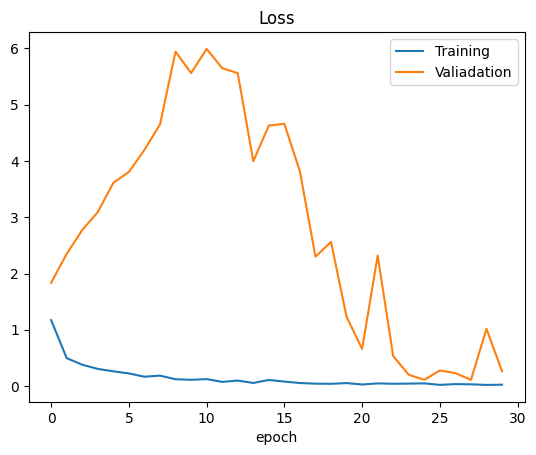

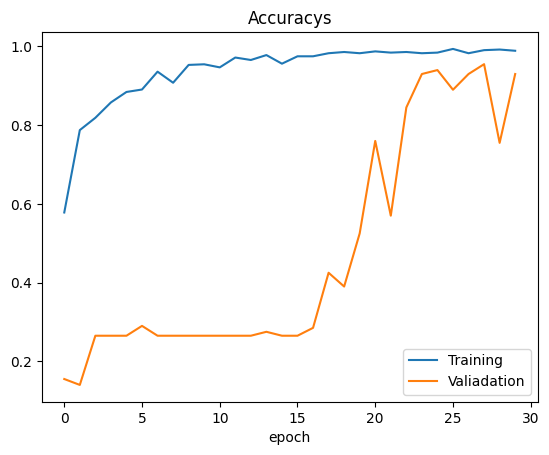

test score 0.26098740100860596
Test Accuracy  0.9300000071525574


In [26]:
plt.figure(1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Training','Valiadation'])
plt.title('Loss')
plt.xlabel('epoch')

plt.figure(2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Training','Valiadation'])
plt.title('Accuracys')
plt.xlabel('epoch')
plt.show()
score = model1.evaluate(X_test,y_test,verbose = 0)
print('test score' , score[0])
print('Test Accuracy ',score[1])

7/7 [==============================] - 0s 21ms/step


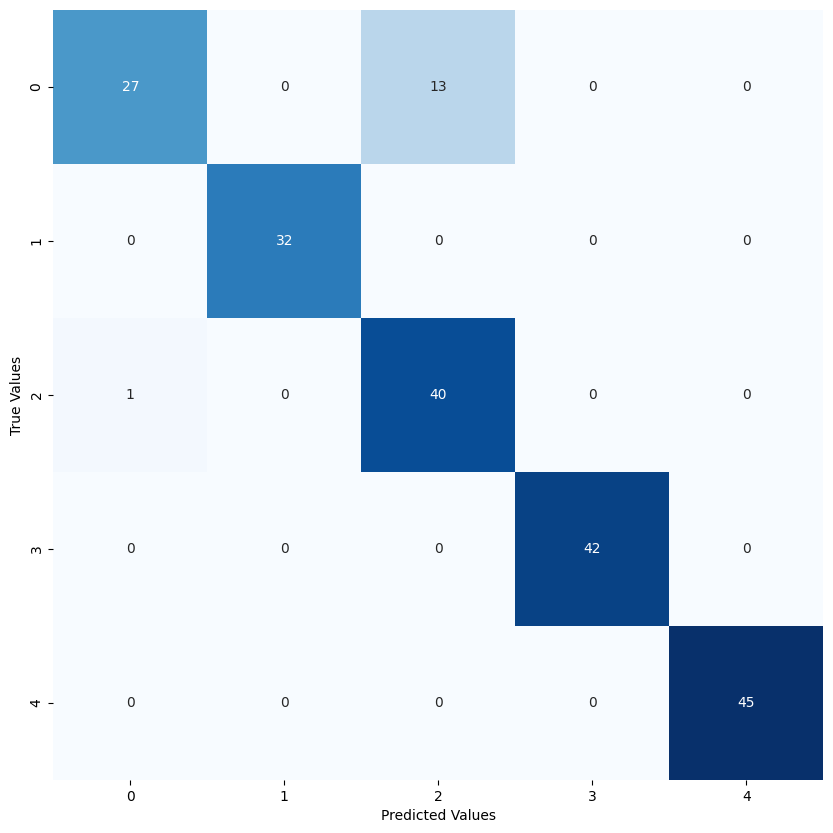

In [27]:
fig = plt.figure(figsize=(10, 10)) # Set Figure

y_pred = model1.predict(X_test) # Predict class probabilities as 2 => [0.1, 0, 0.9, 0, 0, 0, 0, 0, 0, 0]

Y_pred = np.argmax(y_pred, 1) # Decode Predicted labels
Y_test = np.argmax(y_test, 1) # Decode labels

mat = confusion_matrix(Y_test, Y_pred) # Confusion matrix

# Plot Confusion matrix
sns.heatmap(mat.T, square=True, annot=True, cbar=False, cmap=plt.cm.Blues, fmt='.0f')
plt.xlabel('Predicted Values')
plt.ylabel('True Values');
plt.show();

In [28]:
y_predicted = model1.predict(X_validate)
#y_predicted[4]
lenofval = len(X_validate)
print(lenofval)
chatlabel = []
imageindex = []
for x in range (0, lenofval):
    #print(x)
    pred = np.argmax(y_predicted[x])
    #print('prs val',pred)
    chatlabel.append(pred)
    #imageindex.append(x)
#chatlabel
#imageindex
    #plt.matshow(X_validate[x])

2/2 [==============================] - 0s 25ms/step
50


In [29]:
df = pd.DataFrame(chatlabel, columns =['chart_type_encoded'])
y = ['dot_line', 'hbar_categorical', 'line', 'pie', 'vbar_categorical']
label_enc = LabelEncoder()
label_enc.fit(y)
# Encode the labels in the 'chart_type' column
df['chart_type'] = label_enc.inverse_transform(df['chart_type_encoded'])
df

,chart_type_encoded,chart_type
0,4,vbar_categorical
1,1,hbar_categorical
2,0,dot_line
3,1,hbar_categorical
4,0,dot_line
5,0,dot_line
6,3,pie
7,2,line
8,1,hbar_categorical
9,4,vbar_categorical


In [30]:
train_steps = X_train.shape[0] 
valid_steps = X_test.shape[0] 

es = tf.keras.callbacks.EarlyStopping(
        monitor="val_accuracy", # metrics to monitor
        patience=10, # how many epochs before stop
        verbose=1,
        mode="max", # we need the maximum accuracy.
        restore_best_weights=True, # 
     )

rp = tf.keras.callbacks.ReduceLROnPlateau(
        monitor="val_accuracy",
        factor=0.2,
        patience=3,
        verbose=1,
        mode="max",
        min_lr=0.00001,
     )

## Model 2

In [31]:
model2 = myModel()

#batchSizeVal = 40
#epochsVal = 100
#stepsPerEpoch = 10
#history = model2.fit(X_train, y_train, validation_data=(X_test, y_test), steps_per_epoch = stepsPerEpoch, epochs = epochsVal, batch_size=16,callbacks=[es, rp])
batchSizeVal = 40
epochsVal = 30
stepsPerEpoch = 20
# history = model.fit(dataGen.flow(X_train,y_train,batch_size = batchSizeVal),
#                    steps_per_epoch = stepsPerEpoch, epochs = epochsVal, validation_data = (X_test,y_test),
#                    shuffle = 1)
history = model2.fit(X_train, y_train, validation_data=(X_test, y_test), steps_per_epoch = stepsPerEpoch, epochs = epochsVal, batch_size=32,callbacks=[es, rp])


Epoch 1/30
20/20 [==============================] - 3s 124ms/step - loss: 1.1241 - accuracy: 0.5906 - val_loss: 1.7189 - val_accuracy: 0.1400 - lr: 0.0010
Epoch 2/30
20/20 [==============================] - 2s 123ms/step - loss: 0.3966 - accuracy: 0.8203 - val_loss: 1.9158 - val_accuracy: 0.1400 - lr: 0.0010
Epoch 3/30
20/20 [==============================] - 2s 118ms/step - loss: 0.3698 - accuracy: 0.8422 - val_loss: 2.2433 - val_accuracy: 0.2900 - lr: 0.0010
Epoch 4/30
20/20 [==============================] - 2s 118ms/step - loss: 0.2734 - accuracy: 0.8734 - val_loss: 2.7583 - val_accuracy: 0.2750 - lr: 0.0010
Epoch 5/30
20/20 [==============================] - 2s 119ms/step - loss: 0.2352 - accuracy: 0.8922 - val_loss: 2.8149 - val_accuracy: 0.2950 - lr: 0.0010
Epoch 6/30
20/20 [==============================] - 2s 118ms/step - loss: 0.1597 - accuracy: 0.9297 - val_loss: 3.0573 - val_accuracy: 0.2750 - lr: 0.0010
Epoch 7/30
20/20 [==============================] - 2s 116ms/step - lo

In [32]:
model2.evaluate(X_test, y_test)

7/7 [==============================] - 0s 29ms/step - loss: 0.1284 - accuracy: 0.9500


[0.12839274108409882, 0.949999988079071]

In [33]:
#model2.evaluate(X_validate, y_validate)
y_predicted = model2.predict(X_validate)
#y_predicted[4]
lenofval = len(X_validate)
chatlabel = []
for x in range (0, lenofval):
    #print(x)
    pred = np.argmax(y_predicted[x])
    #print('prs val',pred)
    chatlabel.append(pred)
    imageindex.append(x)
#chatlabel
imageindex
df = pd.DataFrame(chatlabel, columns =['chart_type_encoded'])
y = ['dot_line', 'hbar_categorical', 'line', 'pie', 'vbar_categorical']
label_enc = LabelEncoder()
label_enc.fit(y)
# Encode the labels in the 'chart_type' column
df['chart_type'] = label_enc.inverse_transform(df['chart_type_encoded'])
df

2/2 [==============================] - 0s 17ms/step


,chart_type_encoded,chart_type
0,4,vbar_categorical
1,1,hbar_categorical
2,0,dot_line
3,1,hbar_categorical
4,2,line
5,2,line
6,3,pie
7,2,line
8,1,hbar_categorical
9,4,vbar_categorical


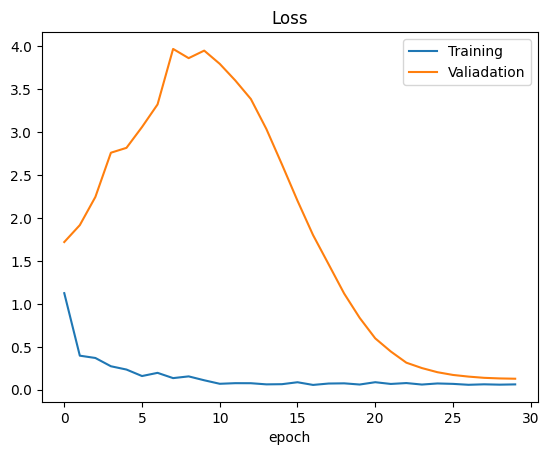

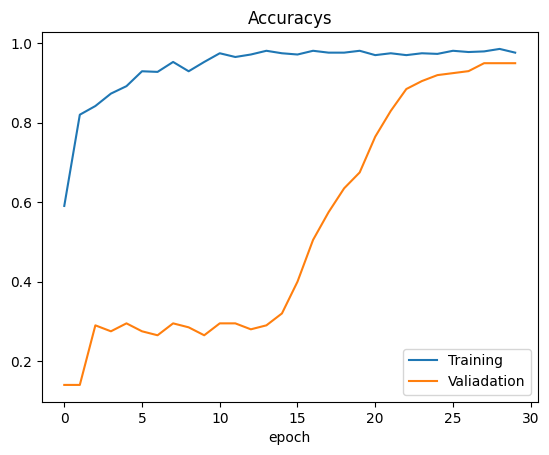

test score 0.12839274108409882
Test Accuracy  0.949999988079071


In [34]:
plt.figure(1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Training','Valiadation'])
plt.title('Loss')
plt.xlabel('epoch')

plt.figure(2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Training','Valiadation'])
plt.title('Accuracys')
plt.xlabel('epoch')
plt.show()
score = model2.evaluate(X_test,y_test,verbose = 0)
print('test score' , score[0])
print('Test Accuracy ',score[1])

7/7 [==============================] - 0s 27ms/step


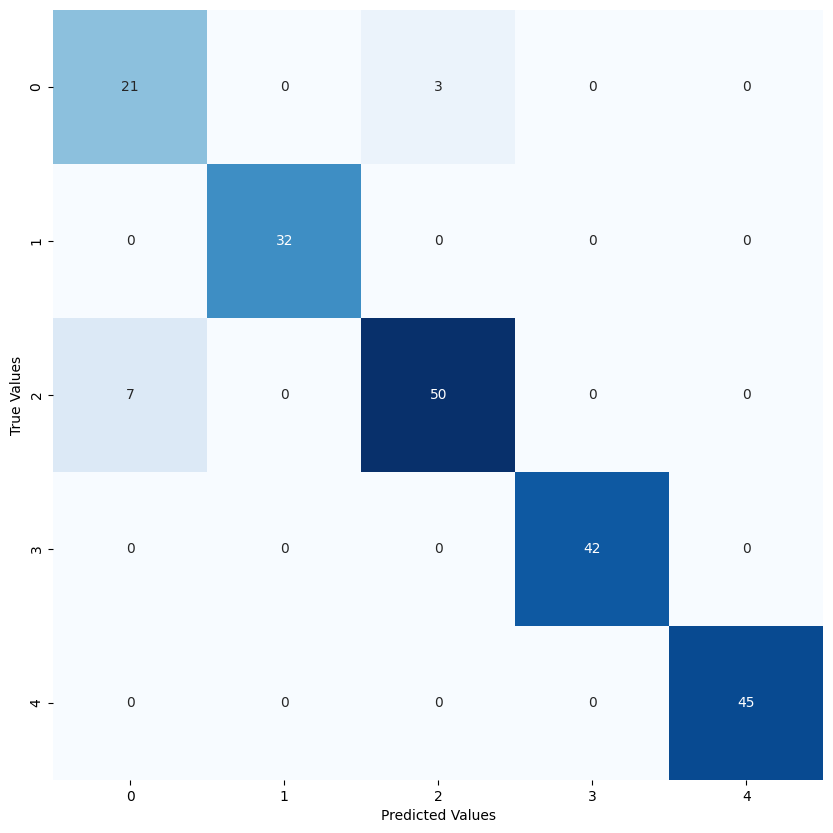

In [35]:
fig = plt.figure(figsize=(10, 10)) # Set Figure

y_pred = model2.predict(X_test) # Predict class probabilities as 2 => [0.1, 0, 0.9, 0, 0, 0, 0, 0, 0, 0]

Y_pred = np.argmax(y_pred, 1) # Decode Predicted labels
Y_test = np.argmax(y_test, 1) # Decode labels

mat = confusion_matrix(Y_test, Y_pred) # Confusion matrix

# Plot Confusion matrix
sns.heatmap(mat.T, square=True, annot=True, cbar=False, cmap=plt.cm.Blues, fmt='.0f')
plt.xlabel('Predicted Values')
plt.ylabel('True Values');
plt.show();

## Model 3

In [36]:
model3 = myModel()
batchSizeVal = 10
epochsVal = 100
stepsPerEpoch = 20
history = model3.fit(X_train, y_train, validation_data=(X_test, y_test), steps_per_epoch = stepsPerEpoch, epochs = epochsVal, batch_size=12,callbacks=[es, rp])


Epoch 1/100
20/20 [==============================] - 3s 77ms/step - loss: 1.6367 - accuracy: 0.4750 - val_loss: 1.7124 - val_accuracy: 0.2650 - lr: 0.0010
Epoch 2/100
20/20 [==============================] - 1s 72ms/step - loss: 0.8370 - accuracy: 0.7042 - val_loss: 1.6243 - val_accuracy: 0.2650 - lr: 0.0010
Epoch 3/100
20/20 [==============================] - 1s 75ms/step - loss: 0.5936 - accuracy: 0.7708 - val_loss: 1.9829 - val_accuracy: 0.1400 - lr: 0.0010
Epoch 4/100
20/20 [==============================] - ETA: 0s - loss: 0.4962 - accuracy: 0.8093
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
20/20 [==============================] - 2s 82ms/step - loss: 0.4962 - accuracy: 0.8093 - val_loss: 1.8524 - val_accuracy: 0.1400 - lr: 0.0010
Epoch 5/100
20/20 [==============================] - 2s 83ms/step - loss: 0.5428 - accuracy: 0.8083 - val_loss: 2.0215 - val_accuracy: 0.1900 - lr: 2.0000e-04
Epoch 6/100
20/20 [==============================] - 2s 79ms/

In [37]:
model3.evaluate(X_test, y_test)

7/7 [==============================] - 0s 26ms/step - loss: 0.1792 - accuracy: 0.9400


[0.17919811606407166, 0.9399999976158142]

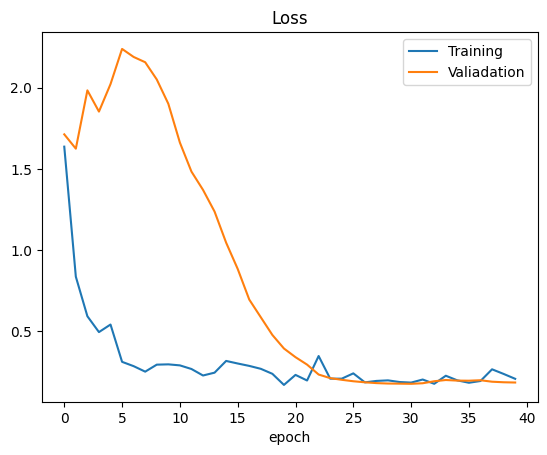

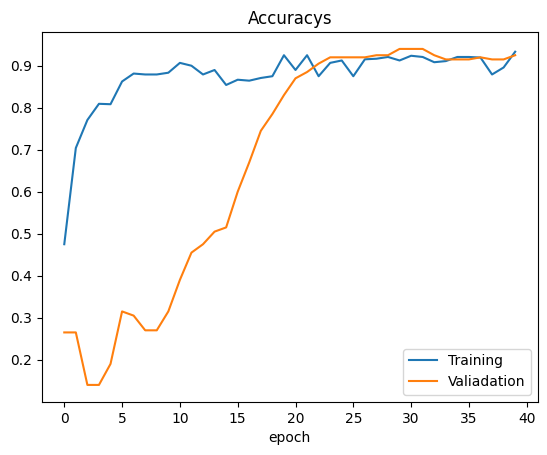

test score 0.17919811606407166
Test Accuracy  0.9399999976158142


In [38]:
plt.figure(1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Training','Valiadation'])
plt.title('Loss')
plt.xlabel('epoch')

plt.figure(2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Training','Valiadation'])
plt.title('Accuracys')
plt.xlabel('epoch')
plt.show()
score = model3.evaluate(X_test,y_test,verbose = 0)
print('test score' , score[0])
print('Test Accuracy ',score[1])

7/7 [==============================] - 0s 22ms/step


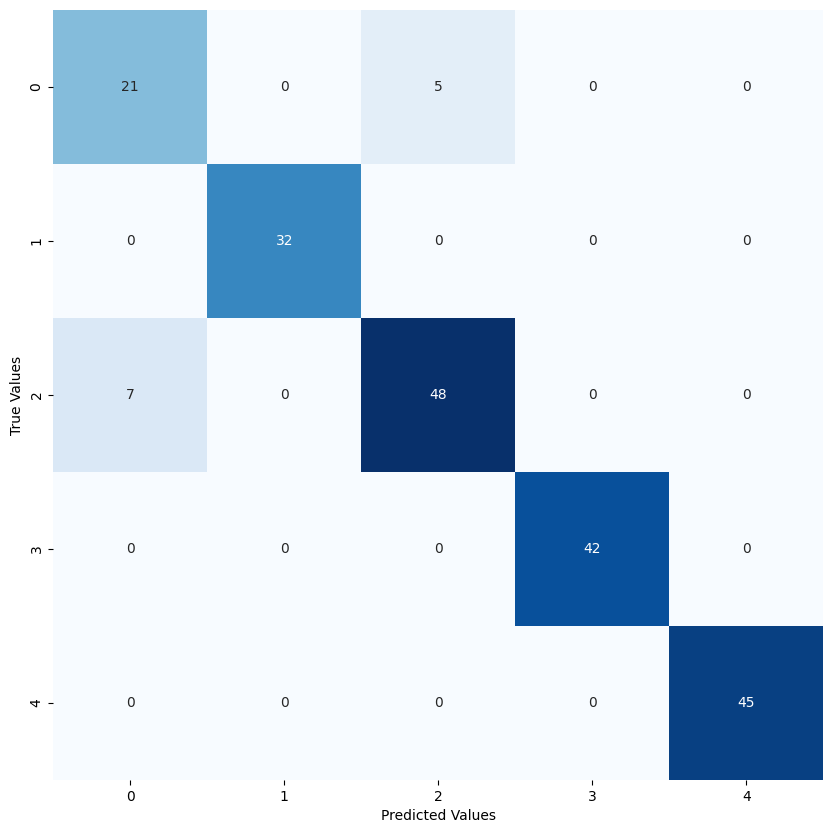

In [39]:
fig = plt.figure(figsize=(10, 10)) # Set Figure

y_pred = model3.predict(X_test) # Predict class probabilities as 2 => [0.1, 0, 0.9, 0, 0, 0, 0, 0, 0, 0]

Y_pred = np.argmax(y_pred, 1) # Decode Predicted labels
Y_test = np.argmax(y_test, 1) # Decode labels

mat = confusion_matrix(Y_test, Y_pred) # Confusion matrix

# Plot Confusion matrix
sns.heatmap(mat.T, square=True, annot=True, cbar=False, cmap=plt.cm.Blues, fmt='.0f')
plt.xlabel('Predicted Values')
plt.ylabel('True Values');
plt.show();

## Model 4

In [40]:
model4 = myModel()
batchSizeVal = 10
epochsVal = 200
stepsPerEpoch = 20
# history = model4.fit(dataGen.flow(X_train,y_train,batch_size = batchSizeVal),
#                    steps_per_epoch = stepsPerEpoch, epochs = epochsVal, validation_data = (X_test,y_test),
#                    shuffle = 1,callbacks=[es, rp] )
history = model4.fit(X_train, y_train, validation_data=(X_test, y_test), steps_per_epoch = stepsPerEpoch, epochs = epochsVal, batch_size=32,callbacks=[es, rp])


Epoch 1/200
20/20 [==============================] - 4s 131ms/step - loss: 1.1596 - accuracy: 0.5828 - val_loss: 1.7973 - val_accuracy: 0.1400 - lr: 0.0010
Epoch 2/200
20/20 [==============================] - 3s 125ms/step - loss: 0.4569 - accuracy: 0.8047 - val_loss: 1.9084 - val_accuracy: 0.3100 - lr: 0.0010
Epoch 3/200
20/20 [==============================] - 3s 129ms/step - loss: 0.3156 - accuracy: 0.8719 - val_loss: 2.4588 - val_accuracy: 0.2650 - lr: 0.0010
Epoch 4/200
20/20 [==============================] - 3s 127ms/step - loss: 0.3048 - accuracy: 0.8672 - val_loss: 3.0899 - val_accuracy: 0.2650 - lr: 0.0010
Epoch 5/200
20/20 [==============================] - ETA: 0s - loss: 0.1843 - accuracy: 0.9203
Epoch 5: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
20/20 [==============================] - 3s 129ms/step - loss: 0.1843 - accuracy: 0.9203 - val_loss: 3.5411 - val_accuracy: 0.2650 - lr: 0.0010
Epoch 6/200
20/20 [==============================] - 2s 124m

In [41]:
model4.evaluate(X_test, y_test)

7/7 [==============================] - 0s 27ms/step - loss: 1.9084 - accuracy: 0.3100


[1.9083729982376099, 0.3100000023841858]

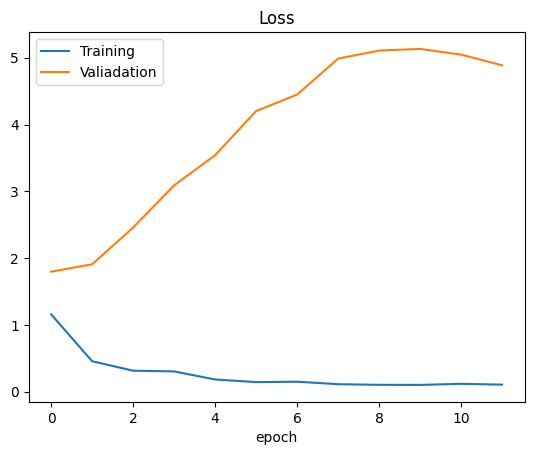

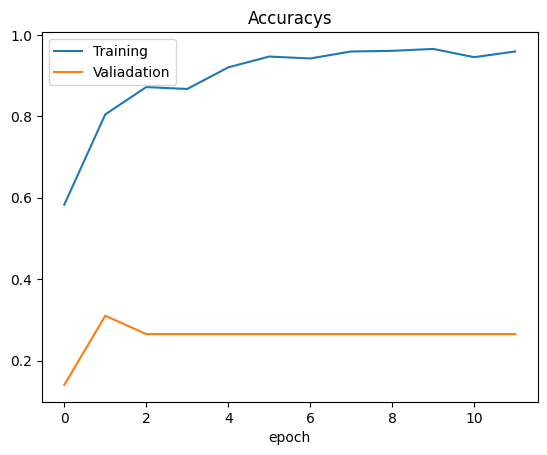

test score 1.9083729982376099
Test Accuracy  0.3100000023841858


In [42]:
plt.figure(1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Training','Valiadation'])
plt.title('Loss')
plt.xlabel('epoch')

plt.figure(2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Training','Valiadation'])
plt.title('Accuracys')
plt.xlabel('epoch')
plt.show()
score = model4.evaluate(X_test,y_test,verbose = 0)
print('test score' , score[0])
print('Test Accuracy ',score[1])

7/7 [==============================] - 0s 25ms/step


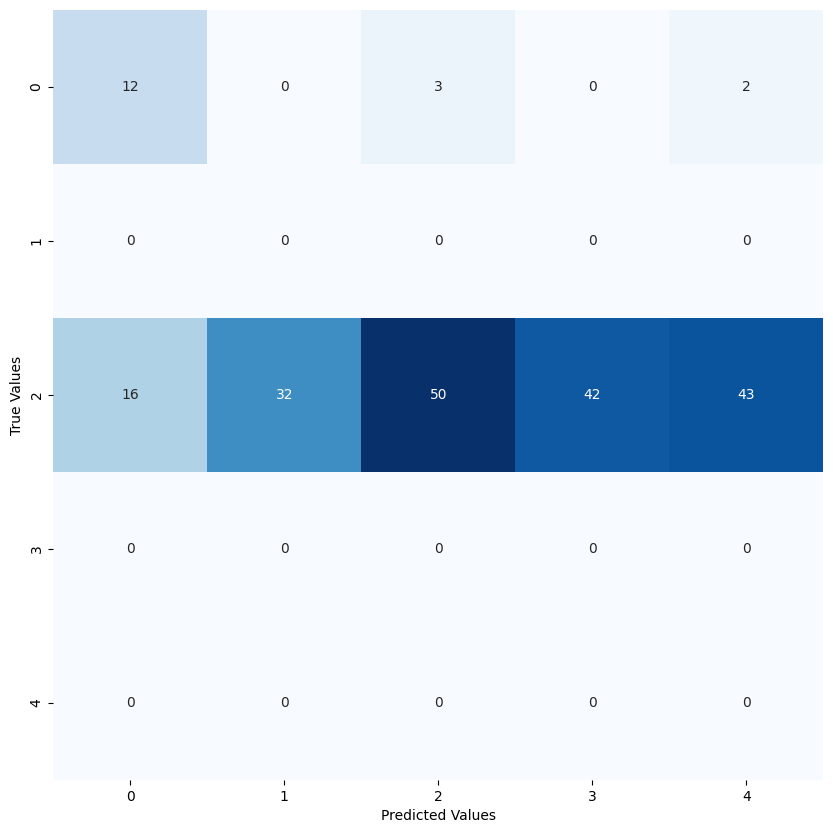

In [43]:
fig = plt.figure(figsize=(10, 10)) # Set Figure

y_pred = model4.predict(X_test) # Predict class probabilities as 2 => [0.1, 0, 0.9, 0, 0, 0, 0, 0, 0, 0]

Y_pred = np.argmax(y_pred, 1) # Decode Predicted labels
Y_test = np.argmax(y_test, 1) # Decode labels

mat = confusion_matrix(Y_test, Y_pred) # Confusion matrix

# Plot Confusion matrix
sns.heatmap(mat.T, square=True, annot=True, cbar=False, cmap=plt.cm.Blues, fmt='.0f')
plt.xlabel('Predicted Values')
plt.ylabel('True Values');
plt.show();

In [44]:
# Get the weights of the model
weights = model4.get_weights()

# Print the shape of the weights for each layer
for i in range(len(weights)):
    print("Layer {}: {}".format(i, weights[i].shape))

Layer 0: (5, 5, 1, 60)
Layer 1: (60,)
Layer 2: (5, 5, 60, 60)
Layer 3: (60,)
Layer 4: (60,)
Layer 5: (60,)
Layer 6: (60,)
Layer 7: (60,)
Layer 8: (3, 3, 60, 30)
Layer 9: (30,)
Layer 10: (3, 3, 30, 30)
Layer 11: (30,)
Layer 12: (30,)
Layer 13: (30,)
Layer 14: (30,)
Layer 15: (30,)
Layer 16: (480, 500)
Layer 17: (500,)
Layer 18: (500, 5)
Layer 19: (5,)
